In [155]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [156]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [157]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [158]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)
X_train

array([[ 1.81562317, -0.35266264,  1.67875305, ...,  1.09329943,
        -0.25460131,  0.29539131],
       [ 1.8241327 ,  2.40834014,  1.97597754, ...,  2.30295932,
         1.84050384,  2.3371604 ],
       [-0.30041352,  0.78660927, -0.21522741, ..., -0.03061241,
         1.90475164,  1.37989873],
       ...,
       [-1.10881897, -1.08351632, -1.07470154, ..., -1.13094354,
        -0.74977949,  0.05374111],
       [-0.09051176,  0.08441652, -0.14670065, ..., -0.85287489,
        -0.62598494, -0.8667477 ],
       [ 0.29809015,  2.71644513,  0.46095829, ...,  1.85278209,
         1.84363788,  3.32360687]])

In [159]:
len(df.iloc[:,:-1].columns)

30

In [160]:
model=Sequential()
model.add(Dense(units=15,input_dim=30,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [161]:
model.fit(X_train,y_train,batch_size=10,epochs=600,verbose=1,validation_data=(X_test,y_test))

Epoch 1/600
40/40 [==============================] - 1s 4ms/step - loss: 0.5956 - accuracy: 0.6407 - val_loss: 0.4519 - val_accuracy: 0.7544
Epoch 2/600
40/40 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8166 - val_loss: 0.3429 - val_accuracy: 0.9064
Epoch 3/600
40/40 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.9322 - val_loss: 0.2740 - val_accuracy: 0.9357
Epoch 4/600
40/40 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9472 - val_loss: 0.2217 - val_accuracy: 0.9532
Epoch 5/600
40/40 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9573 - val_loss: 0.1851 - val_accuracy: 0.9708
Epoch 6/600
40/40 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9598 - val_loss: 0.1609 - val_accuracy: 0.9708
Epoch 7/600
40/40 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9623 - val_loss: 0.1453 - val_accuracy: 0.9708
Epoch 8/600
4

In [162]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [163]:
evalute_df=pd.DataFrame(model.history.history)
evalute_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.595601,0.640703,0.451939,0.754386
1,0.409930,0.816583,0.342942,0.906433
2,0.302035,0.932161,0.273950,0.935673
3,0.229474,0.947236,0.221738,0.953216
4,0.178884,0.957286,0.185090,0.970760


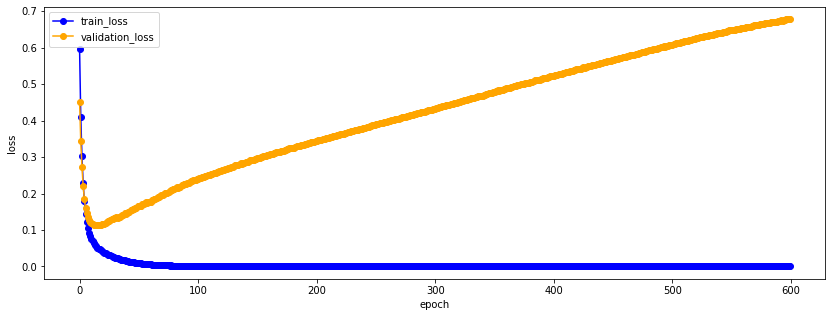

In [164]:
plt.figure(figsize=(14,5))
plt.plot(evalute_df.loss,label='train_loss',c='blue',marker='o')
plt.plot(evalute_df.val_loss,label='validation_loss',c='orange',marker='o')     #overfitting problem
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

To handle the overfitting problem for validation/test data we can use Callbacks which will monitor for val_loss data and the mode will be for minimize

In [166]:
model1=Sequential()
model1.add(Dense(units=15,input_dim=30,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [167]:
stopping=EarlyStopping(monitor='val_loss',mode='min',patience=50,verbose=1)
model1.fit(X_train,y_train,batch_size=10,epochs=600,validation_data=(X_test,y_test),callbacks=[stopping])

Epoch 1/600
40/40 [==============================] - 1s 4ms/step - loss: 0.5678 - accuracy: 0.7764 - val_loss: 0.4729 - val_accuracy: 0.8246
Epoch 2/600
40/40 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.9045 - val_loss: 0.3189 - val_accuracy: 0.9181
Epoch 3/600
40/40 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9246 - val_loss: 0.2275 - val_accuracy: 0.9298
Epoch 4/600
40/40 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9322 - val_loss: 0.1768 - val_accuracy: 0.9474
Epoch 5/600
40/40 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9397 - val_loss: 0.1502 - val_accuracy: 0.9649
Epoch 6/600
40/40 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9422 - val_loss: 0.1319 - val_accuracy: 0.9649
Epoch 7/600
40/40 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9497 - val_loss: 0.1206 - val_accuracy: 0.9708
Epoch 8/600
4

In [168]:
evalute_df1=pd.DataFrame(model1.history.history)
evalute_df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.567842,0.776382,0.472901,0.824561
1,0.383073,0.904523,0.318857,0.918129
2,0.267852,0.924623,0.227472,0.929825
3,0.198745,0.932161,0.176838,0.947368
4,0.159303,0.939699,0.150203,0.964912


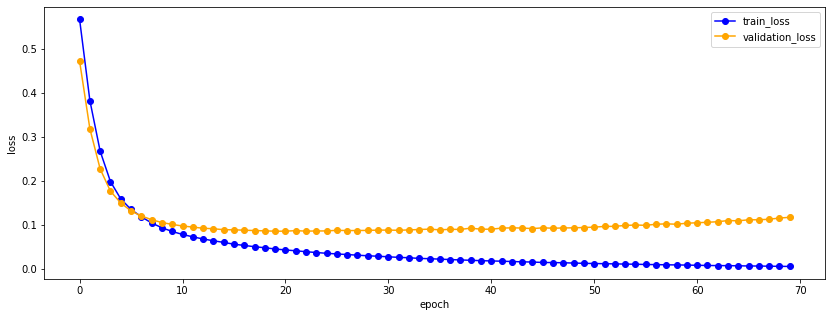

In [169]:
plt.figure(figsize=(14,5))
plt.plot(evalute_df1.loss,label='train_loss',c='blue',marker='o')
plt.plot(evalute_df1.val_loss,label='validation_loss',c='orange',marker='o')     
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

Also we can use Dropout to inactive some neurons in some hidden layers also callbacks to reduce overfitting problem 

In [171]:
model1=Sequential()
model1.add(Dense(units=15,input_dim=30,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [172]:
stopping1=EarlyStopping(monitor='val_loss',mode='min',patience=50,verbose=1)
model1.fit(X_train,y_train,batch_size=10,epochs=600,validation_data=(X_test,y_test),callbacks=[stopping1])

Epoch 1/600
40/40 [==============================] - 1s 9ms/step - loss: 0.8030 - accuracy: 0.5402 - val_loss: 0.6305 - val_accuracy: 0.6257
Epoch 2/600
40/40 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.6206 - val_loss: 0.5282 - val_accuracy: 0.8129
Epoch 3/600
40/40 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7035 - val_loss: 0.4633 - val_accuracy: 0.8772
Epoch 4/600
40/40 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7211 - val_loss: 0.4164 - val_accuracy: 0.9181
Epoch 5/600
40/40 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7060 - val_loss: 0.3621 - val_accuracy: 0.9181
Epoch 6/600
40/40 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7990 - val_loss: 0.3101 - val_accuracy: 0.9415
Epoch 7/600
40/40 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7990 - val_loss: 0.2667 - val_accuracy: 0.9474
Epoch 8/600
4

In [173]:
evalute_df2=pd.DataFrame(model1.history.history)
evalute_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.802987,0.540201,0.630529,0.625731
1,0.690719,0.620603,0.528169,0.812865
2,0.589182,0.703518,0.463315,0.877193
3,0.572812,0.721106,0.416379,0.918129
4,0.520415,0.706030,0.362069,0.918129


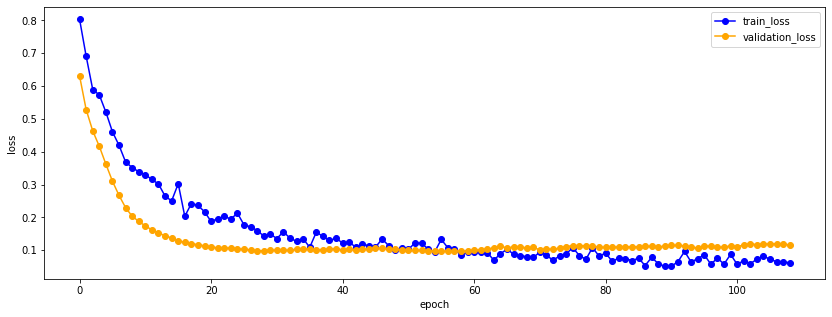

In [174]:
plt.figure(figsize=(14,5))
plt.plot(evalute_df2.loss,label='train_loss',c='blue',marker='o')
plt.plot(evalute_df2.val_loss,label='validation_loss',c='orange',marker='o')    #hence by using droupout and calbacks we can reduce the overfitting by early stopping 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()